In [87]:
library(cicero)
library(monocle3)
library(Seurat)
library(Signac)
library(GenomicRanges)
library(ggforce)
library(BSgenome.Hsapiens.UCSC.hg38)
library(data.table)
library(biomaRt)
library(dplyr)


Attaching package: 'dplyr'


The following object is masked from 'package:biomaRt':

    select


The following objects are masked from 'package:data.table':

    between, first, last


The following objects are masked from 'package:Biostrings':

    collapse, intersect, setdiff, setequal, union


The following object is masked from 'package:XVector':

    slice


The following objects are masked from 'package:GenomicRanges':

    intersect, setdiff, union


The following object is masked from 'package:GenomeInfoDb':

    intersect


The following objects are masked from 'package:IRanges':

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from 'package:S4Vectors':

    first, intersect, rename, setdiff, setequal, union


The following object is masked from 'package:matrixStats':

    count


The following object is masked from 'package:Biobase':

    combine


The following objects are masked from 'package:BiocGenerics':

    combine, intersect, 

In [69]:
# reads conns from more_atac_analysis
conns              <- fread('{PATH_1}')
dasahic2_conns     <- fread('{PATH_2}')

rownames(conns) <- NULL
rownames(dasahic2_conns) <- NULL
rownames(conns) <- seq_along(conns$Peak1)
rownames(dasahic2_conns) <- seq_along(dasahic2_conns$Peak1)
conns$V1 = NULL
conns$CCAN.y = NULL
conns$CCAN = NULL
dasahic2_conns$V1 = NULL
dasahic2_conns$CCAN.y = NULL
dasahic2_conns$CCAN = NULL

Warning message in set(x, j = name, value = value):
"Column 'CCAN.y' does not exist to remove"


In [71]:
# change _ to -
conns$Peak1 <- gsub("_", "-", conns$Peak1)
conns$Peak2 <- gsub("_", "-", conns$Peak2)

dasahic2_conns$Peak1 <- gsub("_", "-", dasahic2_conns$Peak1)
dasahic2_conns$Peak2 <- gsub("_", "-", dasahic2_conns$Peak2)


In [13]:
sobj <- readRDS('{PATH_3}')

In [14]:
sobj

An object of class Seurat 
344955 features across 7609 samples within 4 assays 
Active assay: ATAC (279098 features, 0 variable features)
 2 layers present: counts, data
 3 other assays present: SCT, RNA, PRTB
 5 dimensional reductions calculated: integrated_lsi, atac.umap, pca, rna.umap, wnn.umap

In [20]:
# subset sobj for DMSO_NT, DASA_NT, DASA_HIC2
Idents(sobj) <- sobj$treatment_and_guidecapture
sub_sobj <- subset(sobj, idents = c("DMSO_NT", "DASA_NT", "DASA_HIC2"))
dasa_hic2_nt_sobj <- subset(sobj, idents = c("DASA_NT", "DASA_HIC2"))

In [72]:
# only way I could get this to run is to hard set coaccess_cutoff_override
# default is it tries to calc one on it's own (coaccess_cutoff_override = NULL)
ccans <- generate_ccans(conns)
hic2_ccans <- generate_ccans(dasahic2_conns) 

[1] "Coaccessibility cutoff used: 0.15"
[1] "Coaccessibility cutoff used: 0.34"


In [73]:
links <- ConnectionsToLinks(conns = conns, ccans = ccans)
hic2_links <- ConnectionsToLinks(conns = dasahic2_conns, ccans = hic2_ccans)

In [100]:
Links(sub_sobj) <- hic2_links[hic2_links$score > 0.2]
# Links(sub_sobj) <- hic2_links

In [76]:
genes <- c("ZFPM2", "PTH2R", "TCF4", "APOE", "NCOA1", "RELN", "LMO2", "LGR4", "CPQ", "IQGAP2")

In [105]:
options(repr.plot.width = 50, repr.plot.height = 30)
p1 <- CoveragePlot(sub_sobj, 
    region = genes,
    min.cutoff = 0.25,
    extend.upstream = 50000,
    extend.downstream = 50000,
    nrow = 2,
    expression.assay = "SCT") 

Warning message:
"Removed 36 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 77 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 77 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 103 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 4 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 235 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 17 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 28 rows containing missing values or values outside the

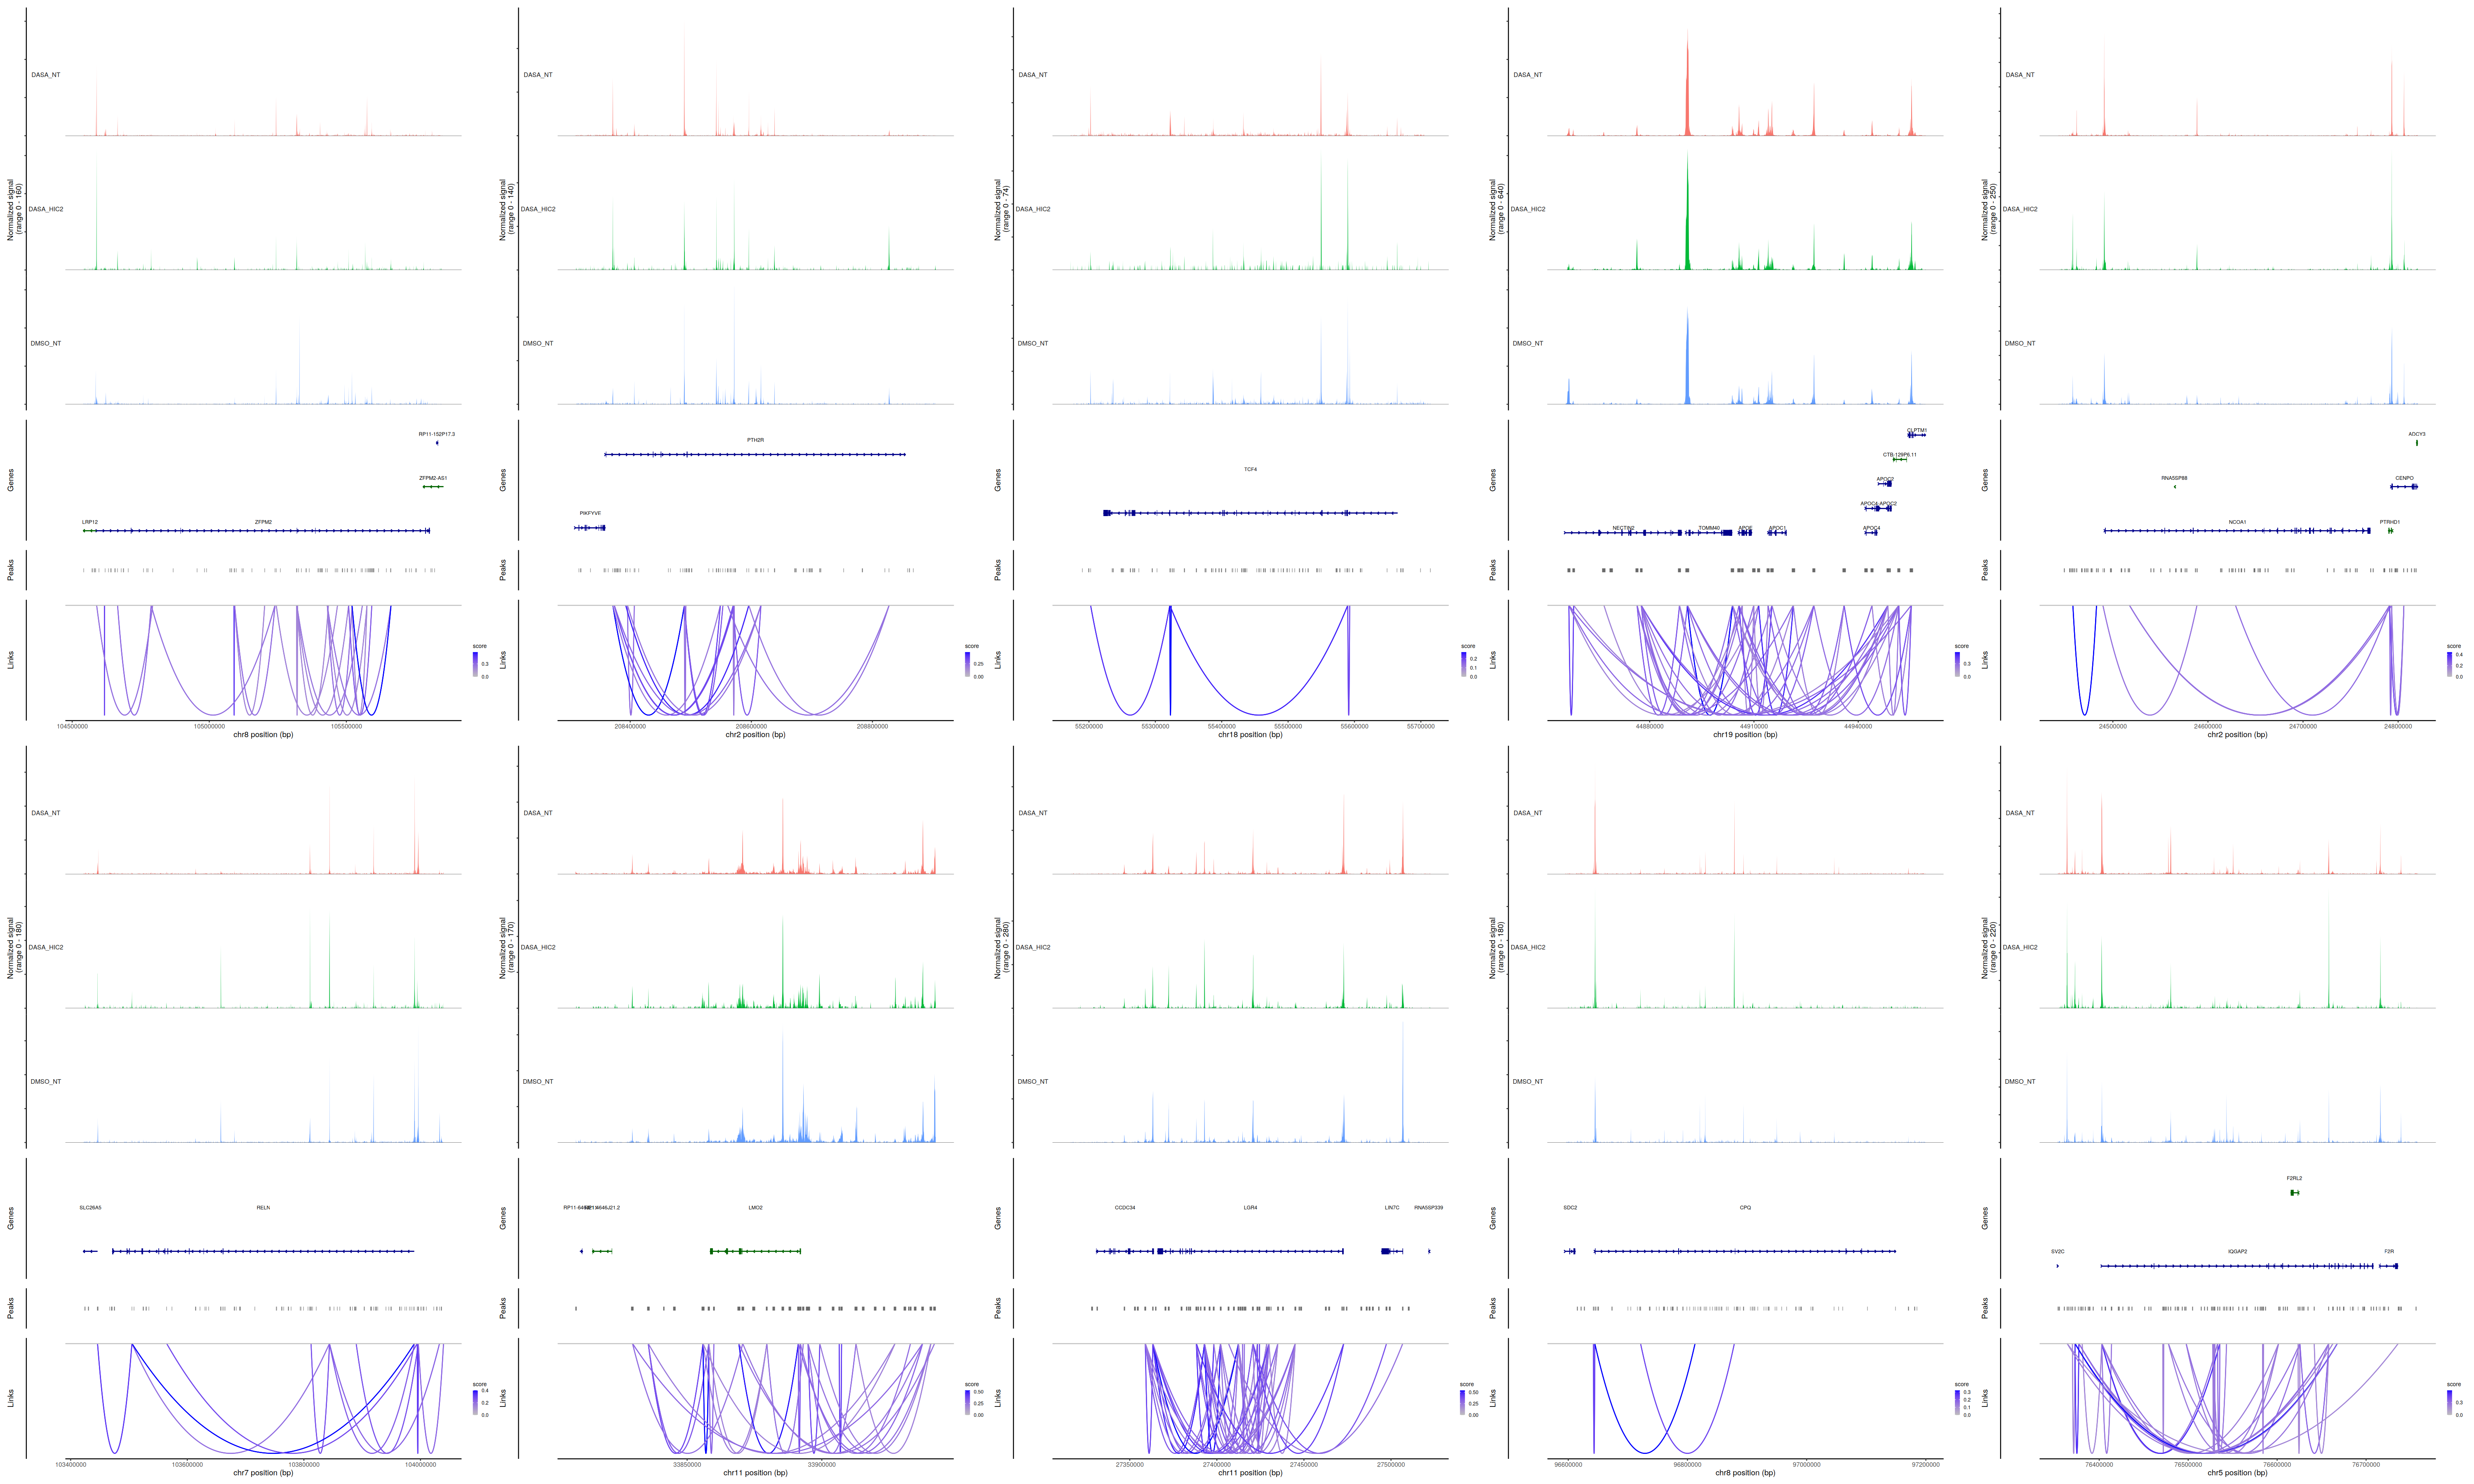

In [107]:
p1

In [110]:
ggsave("08bc_coverageplots.pdf", p1, width = 70, height = 30, units = "cm")

Warning message:
"Removed 36 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 77 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 77 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 103 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 4 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 1 row containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 235 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 17 rows containing missing values or values outside the scale range
(`geom_segment()`)."
Warning message:
"Removed 28 rows containing missing values or values outside the